In [1]:
from mc import generateSurface, df, cubeVertexs, cubeCenterVertex, tracedMarchingCubes, genGrid
import meshplot as mp
import numpy as np

In [14]:
N = 128
d, ev, en, polis = cubeVertexs( N, df, surfaceThresh=0.0015 )

In [17]:
cubeCenterVertex( d, ev, en,N, threshold=0.1, alpha=4 )
v,t = generateSurface( d, polis )

In [18]:
mp.plot(v,t)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.009910…

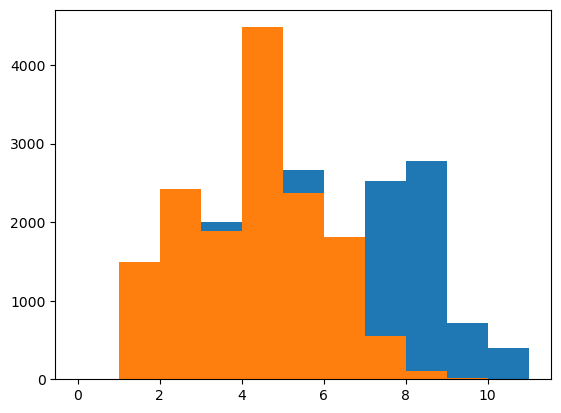

In [19]:
import matplotlib.pyplot as plt
plt.hist( [ len(i['edgeVertexIndexs']) for i in d.values() ], bins=np.arange(0,12) )
plt.hist( [ i['X'].shape[0] for i in d.values() ], bins=np.arange(0,12))
plt.show()

In [20]:
edgeVertexs =  [np.concatenate( [ev[ edge ] for edge in cubeIdx['edgeVertexIndexs'].values()] )for cubeIdx in d.values() ]
edgeNormals =  [np.concatenate( [en[ edge ] for edge in cubeIdx['edgeVertexIndexs'].values()] )for cubeIdx in d.values() ]
edgeVertexsUsadas =  [ cubeIdx['X']for cubeIdx in d.values() ]
edgeNormalsUsadas =  [ cubeIdx['A']for cubeIdx in d.values() ]
vertexs = np.array([ i['vertex'] for i in d.values() ] )
len(edgeVertexs)

15135

In [21]:
I = 18
p = mp.plot(edgeVertexsUsadas[I],shading={'point_size':0.17, 'point_color':'black'}, return_plot=True)
p.add_points(edgeVertexs[I],  shading={'point_size':0.13, 'point_color':'red'})
p.add_lines( edgeVertexs[I], edgeNormals[I] )
p.add_points( ev, shading={'point_color': 'blue', 'point_size':0.1})
p.add_points( np.array( [vertexs[I]] ), shading={'point_color':'orange', 'point_size':0.3})
#p.add_points( (np.sum( edgeVertexs[I], axis=0 ) / len(edgeVertexs[I]))[None,...], shading={'point_color':'lightblue', 'point_size':0.1})

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.336170…

4

In [ ]:
P = np.random.uniform( 0,1, (3,3))
print(P)

print( np.eye(3,3) + (P < 0.1 ), '\n',(P < 0.1 ))

In [ ]:
v,t = tracedMarchingCubes( 16, surfaceThresh=0.0045 )
mp.plot(v,t)

In [ ]:
grid = np.concatenate( [ genGrid( 8, i ) for i in range(3) ], axis=0)

p = mp.plot(grid, shading={'point_size':0.2}, return_plot=True)
p.add_points( grid[64 + 8: 64 + 12, :], shading={'point_color':'blue','point_size':0.2})
p.add_lines( np.zeros((3,3)), np.array([[1,0,0],[0,1,0],[0,0,1]]))


In [ ]:
N = 8
x,y=np.meshgrid( np.arange(N),np.arange(N), indexing='ij' )
np.concatenate( [x[...,None], y[...,None]], axis=2 )